In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.6 MB/s eta 0:00:00


In [ ]:
data_prices = pd.read_csv("https://raw.githubusercontent.com/YaswanthAd/NYStockPrediction_RNN/main/prices-split-adjusted.csv")

In [ ]:
data_prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
data_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
data_prices.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [ ]:
data_prices.count()

date      851264
symbol    851264
open      851264
close     851264
low       851264
high      851264
volume    851264
dtype: int64

In [ ]:
data_prices.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [ ]:
data_securities = pd.read_csv("https://raw.githubusercontent.com/YaswanthAd/NYStockPrediction_RNN/main/securities.csv")

In [ ]:
data_securities.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [ ]:

num_samples = 5

ticker_symbols = data_securities['Ticker symbol'].to_numpy()  # Convert the Series to a NumPy array
filter_symbols = np.random.choice(ticker_symbols, size=num_samples, replace=False).tolist()


In [ ]:
def setup_plot():
    """Configure the plot with common settings."""
    fig, axs = plt.subplots(1, 1, figsize=(10, 6))
    axs.set_xlabel('Date')
    axs.set_ylabel("Close stock prices")
    axs.set_title('Close Prices Vs Time')
    return axs

def get_company_data(prices_split_adjusted, symbol):
    """Retrieve data for a specific company based on the symbol."""
    company_data = prices_split_adjusted[prices_split_adjusted['symbol'] == symbol].sort_values(by='date')[["date", "open", "close"]]
    return company_data

def plot_stock_prices(prices_split_adjusted, securities, filter_symbols):
    """Plot stock prices for the given symbols."""
    axs = setup_plot()

    for symbol in filter_symbols:
        company_data = get_company_data(prices_split_adjusted, symbol)
        company_name = securities.loc[securities['Ticker symbol'] == symbol, 'Security'].iloc[0]

        dates = company_data['date']
        company_close = company_data['close']

        axs.plot(dates, company_close, label=company_name)

    axs.legend()
    plt.show()


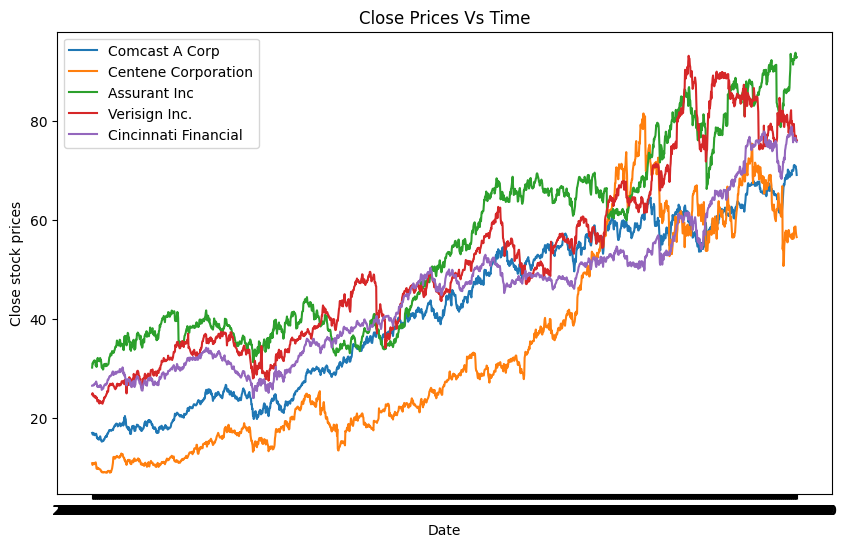

In [ ]:
plot_stock_prices(data_prices, data_securities, filter_symbols)

In [ ]:
import pandas as pd
import random

# Randomly select a symbol from the 'symbol' column in data_prices
random_symbol = random.choice(data_prices['symbol'].unique())

# Filter the data_prices DataFrame for the randomly selected symbol
company_symbol = random_symbol
Closing_Prices_List = data_prices[data_prices['symbol'] == company_symbol].sort_values(by='date')['close'].tolist()

# Create a DataFrame using pandas and enumerate to add an 'index' column
Closing_Prices_dataframe = pd.DataFrame(enumerate(Closing_Prices_List), columns=["index", "close"])

# Display the DataFrame
Closing_Prices_dataframe.head(10)


,index,close
0,0,48.310001
1,1,48.119999
2,2,47.930000
3,3,48.770000
4,4,49.639999
5,5,49.430000
6,6,48.040001
7,7,47.980000
8,8,47.799999
9,9,46.790001


In [ ]:
from sklearn.preprocessing import MinMaxScaler
max_scaling = 1
min_scaling = 0
scaler = MinMaxScaler(feature_range = (min_scaling, max_scaling))
standardized_dataset = scaler.fit_transform(Closing_Prices_dataframe)

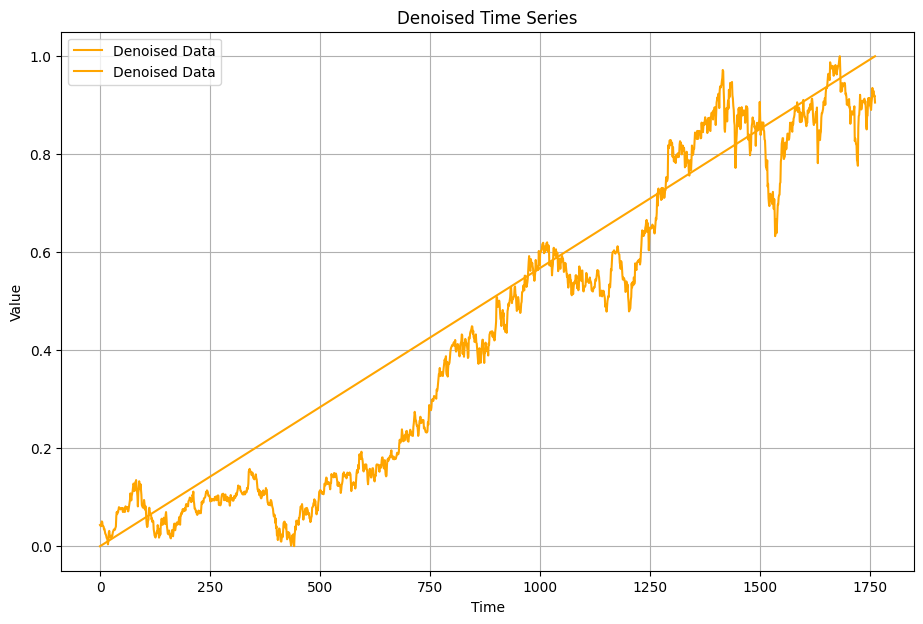

In [ ]:
from scipy.fft import fft, ifft

# Apply the FFT to the standardized dataset to convert it to the frequency domain
stock_prices_fft = fft(standardized_dataset, axis=0)

# Define a threshold for denoising
threshold = 0.1

# Apply thresholding to remove high-frequency noise
stock_prices_fft[np.abs(stock_prices_fft) < threshold] = 0

# Apply IFFT to transform the denoised frequency domain data back to the time domain
scaled_stocks_df = ifft(stock_prices_fft, axis=0)

# Convert the denoised complex data to real values (take the absolute value)
scaled_stocks_df = np.abs(scaled_stocks_df)

# Create a time array for the x-axis (assuming your data is a time series)
time = np.arange(len(scaled_stocks_df))

# Plot the denoised time series with a blue straight line
plt.figure(figsize=(11, 7))
plt.plot(time, scaled_stocks_df, label="Denoised Data", color="orange")  # Change 'color' to the desired color
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Denoised Time Series")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

def process_data_numpy(data, n_features, target_column):

    # Create an array containing row numbers
    row_numbers = np.arange(len(data))

    # Add the row_numbers as a new column to the numpy array
    data_with_row_numbers = np.column_stack((row_numbers, data))

    # Create a new column 'input_sequence' containing the input sequences
    input_sequences = []
    for i in range(len(data_with_row_numbers) - n_features):
        input_sequences.append(data_with_row_numbers[i:i+n_features, 1])

    # Convert the 'target_column' to numpy array
    target_values = data_with_row_numbers[n_features:, 1]

    return np.array(input_sequences), target_values


n_features = 60
target_column = "scaled_features"

# Assuming Stock_Prices_scaled is a numpy array
Input_sequences, Target_values = process_data_numpy(scaled_stocks_df, n_features, target_column)


In [ ]:
def split_train_test_data(Input_sequences, Target_values, train_size=0.8):

    num_samples = len(Input_sequences)
    Training_Samples = int(num_samples * train_size)

    train_input_sequences = Input_sequences[:Training_Samples]
    train_target_values = Target_values[:Training_Samples]

    test_input_sequences = Input_sequences[Training_Samples:]
    test_target_values = Target_values[Training_Samples:]

    return train_input_sequences, train_target_values, test_input_sequences, test_target_values


In [ ]:
train_ratio = 0.8

train_input_sequences, train_target_values, test_input_sequences, test_target_values = split_train_test_data(Input_sequences, Target_values, train_size=train_ratio)

print("Number of training samples:", len(train_input_sequences))
print("Number of test samples:", len(test_input_sequences))

Number of training samples: 1361
Number of test samples: 341


In [ ]:
X_train = np.array(train_input_sequences)
X_test = np.array(test_input_sequences)
Y_train = np.array(train_target_values)
Y_test = np.array(test_target_values)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1361, 60)
(341, 60)
(1361,)
(341,)


In [ ]:
# Define a class named LSTM_Cell.
class RNN_LSTM:

    # Constructor for the LSTM_Cell class.
    def __init__(self, learning_rate, no_of_neurons, LSTM_Units, intializer, activation1, activation2, grad_intializer, gate_intializer):
        # Initialize an empty list to store instance-specific metrics.
        self.metrics = []
        # Store the input parameters as attributes of the instance.
        self.learning_rate = learning_rate
        self.no_of_neurons = no_of_neurons
        self.LSTM_Units = LSTM_Units
        self.intializer = intializer
        self.activation1 = activation1
        self.activation2 = activation2
        self.grad_intializer = grad_intializer
        self.gate_intializer = gate_intializer
        # Set some dimensions for weight and bias matrices used in LSTM operations.
        self.weight_dimensions = no_of_neurons + 1
        self.row_dimensions_weight = no_of_neurons
        self.cols_dimensions_bias = 1
        self.dimensions_error = 1
        self.row_dimensions_bias = no_of_neurons

        self.intialization(intializer, grad_intializer, gate_intializer)


       # Define a function to apply different activation functions to the input x.
    def activation_function(self, x, activation):
        # Check the specified activation function and apply it accordingly.
        if activation == "Sigmoid":
            z = 1 / (1 + np.exp(-x))  # Compute the sigmoid activation.
            return z
        elif activation == "ReLU":
            z = np.maximum(0, x)  # Compute the ReLU activation.
            return z
        elif activation == "Leaky_ReLU":
            z = np.maximum(x * 0.01, x)  # Compute the Leaky ReLU activation.
            return z
        elif activation == "Tanh":
            z = np.tanh(x)  # Compute the hyperbolic tangent (tanh) activation.
            return z
        else:
            raise ValueError("Invalid activation function specified.")

    # Import ortho_group from scipy.stats and define a function to initialize gates using different methods.
    from scipy.stats import ortho_group

    def initialize_gates(self, rows, cols, initialization_method):
        # Check the specified initialization method and initialize gates accordingly.
        if initialization_method == 'zero':
            array = list(np.zeros((rows, cols, 1)))  # Initialize gates with zeros.
        elif initialization_method == 'random':
            array = list(np.random.randn(rows, cols, 1))  # Initialize gates with random values from a standard normal distribution.
        elif initialization_method == 'he':
            # He initialization for ReLU activation
            scale = np.sqrt(2.0 / rows)  # Compute the scale factor based on the number of rows.
            array = list(scale * np.random.randn(rows, cols, 1))  # Initialize gates with random values from a normal distribution scaled by 'scale'.
        elif initialization_method == 'orthogonal':
            if rows != cols:
                raise ValueError("Orthogonal initialization requires square matrices (rows == cols).")
            array = list(ortho_group.rvs(dim=rows)[:, :, np.newaxis])  # Initialize gates with random orthogonal matrices.
        elif initialization_method == 'uniform':
            array = list(np.random.uniform(-1, 1, size=(rows, cols, 1)))  # Initialize gates with random values from a uniform distribution between -1 and 1.
        else:
            raise ValueError(f"Unsupported initialization method: {initialization_method}")

        return array

    # Define a function to initialize gradient weights based on the specified method.
    def initialize_grad_weights(self, rows, columns, grad_initializer):
        # Check the specified grad_initializer and initialize gradient weights accordingly.
        if grad_initializer == "Zero":
            return np.zeros((rows, columns))  # Initialize gradient weights with zeros.
        elif grad_initializer == "Random":
            return np.random.random((rows, columns))  # Initialize gradient weights with random values from a uniform distribution between 0 and 1.
        elif grad_initializer == "Xavier":
            std_dev = np.sqrt(1.0 / (rows + columns))  # Compute the standard deviation based on the number of rows and columns.
            return np.random.randn(rows, columns) * std_dev  # Initialize gradient weights with random values from a normal distribution scaled by 'std_dev'.
        elif grad_initializer == "He-init":
            std_dev = np.sqrt(2.0 / rows)  # Compute the standard deviation based on the number of rows.
            return np.random.randn(rows, columns) * std_dev  # Initialize gradient weights with random values from a normal distribution scaled by 'std_dev'.
        else:
            raise ValueError("Invalid grad_initializer. Supported options are 'Zero', 'Random', 'Xavier', and 'He-init'.")

    # Define a function to initialize weights based on the specified method.
    def initialize_weights(self, num_neurons, num_cells, rows, cols, initializer):
        # Check the specified initializer and initialize weights accordingly.
        if initializer == "Xavier":
            floor_function = -(1.0 / np.sqrt(num_cells))  # Compute the lower bound based on the number of cells.
            sealing_function= 1.0 / np.sqrt(num_cells)  # Compute the upper bound based on the number of cells.
            weights = floor_function + np.random.random((rows, cols)) * (sealing_function- floor_function)  # Initialize weights with random values from a uniform distribution within the specified range.
        elif initializer == "He-init":
            # He initialization
            std_dev = np.sqrt(2.0 / num_cells)  # Compute the standard deviation based on the number of cells.
            weights = np.random.randn(rows, cols) * std_dev  # Initialize weights with random values from a normal distribution scaled by 'std_dev'.
        elif initializer == "Zero":
            weights = np.zeros((rows, cols))  # Initialize weights with zeros.
        elif initializer == "Random":
            weights = np.random.random((rows, cols))  # Initialize weights with random values from a uniform distribution between 0 and 1.
        return weights


    def intialization(self, intializer, grad_intializer, gate_intializer):


        gate_names = ['forget', 'input', 'cell', 'candidate', 'output', 'hidden']
        weight_names = ['forget', 'input', 'cell', 'output']
        bias_names = ['forget', 'input', 'cell', 'output']

        gate_variables = {}
        weight_variables = {}
        bias_variables = {}

        for gate_name in gate_names:
            gate_variables[gate_name] = self.initialize_gates(self.LSTM_Units, self.no_of_neurons, self.gate_intializer)

        for weight_name in weight_names:
            weight_variables[weight_name] = self.initialize_weights(self.no_of_neurons, self.LSTM_Units, self.row_dimensions_weight, self.weight_dimensions, self.intializer)

        for bias_name in bias_names:
            bias_variables[bias_name] = self.initialize_weights(self.no_of_neurons, self.LSTM_Units, self.row_dimensions_bias, self.cols_dimensions_bias, self.intializer)

        (self.gate_forget, self.gate_input, self.gate_cell, self.gate_candidate, self.gate_output, self.gate_hidden) = gate_variables.values()

        (self.forget_weight, self.input_weight, self.cell_weight, self.output_weight) = weight_variables.values()

        (self.forget_bias, self.input_bias, self.cell_bias, self.output_bias) = bias_variables.values()


        # Initialize the output weights.
        self.output_bias_for = self.initialize_weights(self.no_of_neurons, self.LSTM_Units, 1, 1, self.intializer)
        self.output_weight_for = self.initialize_weights(self.no_of_neurons, self.LSTM_Units, 1, self.no_of_neurons, self.intializer)



   # Define a function to perform forward pass of LSTM using the provided test_X.
    def forward_LSTM(self, test_X):

        # Perform the forward pass for each LSTM cell.
        for current_cell in range(1, self.LSTM_Units):
            input_shape = test_X[current_cell].reshape(-1, 1)
            product_shape = np.vstack((self.gate_hidden[current_cell - 1], input_shape))
            self.update_gates_and_hidden_states(product_shape, current_cell)

        # Calculate the final output prediction (y_pred) based on the LSTM gates and hidden states.
        y_pred = self.calculate_output()
        return y_pred


    # Define a function to update gates and hidden states for a given LSTM cell.
    def update_gates_and_hidden_states(self, product_shape, current_cell):
        gate_names = ['forget', 'input', 'output', 'candidate', 'cell', 'hidden']
        states = self.forward_cell(product_shape, current_cell)

        for gate_name, state in zip(gate_names, states):
            setattr(self, f"gate_{gate_name}[{current_cell}]", state)


    # Define a function to calculate the final output prediction (y_pred) based on the LSTM gates and hidden states.
    def calculate_output(self):
        y_pred = np.dot(self.output_weight_for, self.gate_hidden[-1]) + self.output_bias_for
        return y_pred

    # Define a function to perform the forward pass for a single LSTM cell.
    def forward_cell(self, product_shape, index):

        # Calculate the activation values for each gate of the LSTM cell.
        forget_state = self.calculate_gate_activation(self.forget_weight, self.forget_bias, product_shape, self.activation1)
        input_state = self.calculate_gate_activation(self.input_weight, self.input_bias, product_shape, self.activation1)
        output_state = self.calculate_gate_activation(self.output_weight, self.output_bias, product_shape, self.activation1)
        candidate_state = self.calculate_gate_activation(self.cell_weight, self.cell_bias, product_shape, self.activation2)

        # Calculate the internal and hidden states for the LSTM cell.
        internal_state = self.gate_cell[index - 1] * forget_state + input_state * candidate_state
        hidden_state = self.calculate_hidden_activation(internal_state, self.activation2)

        return forget_state, input_state, output_state, candidate_state, internal_state, hidden_state

    # Define a function to calculate the gate activation based on weights, bias, product_shape, and activation function.
    def calculate_gate_activation(self, weights, bias, product_shape, activation):
        return self.activation_function((np.matmul(weights, product_shape) + bias), activation)

    # Define a function to calculate the hidden activation based on internal_state and activation function.
    def calculate_hidden_activation(self, internal_state, activation):
        return self.activation_function(internal_state, activation)

    # Define a function to perform LSTM_backward pass for the LSTM.
    def LSTM_backward(self, Y_true, Y_pred, test_X):

        # Initialize derivatives for each gate and weights.
        gate_names = ['forget', 'input', 'output', 'candidate', 'cell', 'hidden']
        weight_names = ['forget', 'input', 'cell', 'output']
        bias_names = ['forget', 'output', 'input', 'cell']

        derivate_gates = {}
        derivate_weights = {}
        derivate_biases = {}

        for gate_name in gate_names:
            derivate_gates[gate_name] = self.initialize_gates(self.LSTM_Units, self.no_of_neurons, self.gate_intializer)

        for weight_name in weight_names:
            derivate_weights[weight_name] = self.initialize_grad_weights(self.no_of_neurons, 1 + self.no_of_neurons, self.grad_intializer)

        for bias_name in bias_names:
            derivate_biases[bias_name] = self.initialize_grad_weights(self.no_of_neurons, 1, self.grad_intializer)

        (derivate_forget_gate, derivate_input_gate, derivate_output_gate, derivate_candidate_gate, derivate_cell_gate, derivate_hidden_gate) = derivate_gates.values()

        (derivate_weight_forget, derivate_weight_input, derivate_weight_cell, derivate_weight_output) = derivate_weights.values()

        (derivate_bias_forget, derivate_bias_output, derivate_bias_input, derivate_bias_cell) = derivate_biases.values()


        # Calculate the difference between true and predicted values.
        diff = Y_true - Y_pred
        der_w_output = diff * np.transpose(self.gate_hidden[-1])

        # Perform the backward pass for each LSTM cell in reverse order.
        for current in range(self.LSTM_Units - 2, -1, -1):
            # Calculate derivatives for each gate and weights in the current LSTM cell.
            derivate_value_hidden_gate, derivate_value_cell_gate, derivate_value_candidate_gate, derivate_value_input_gate, derivate_value_forget_gate, derivate_value_output_gate = self.LSTM_backward_cell(current, derivate_forget_gate, derivate_input_gate, derivate_output_gate, derivate_candidate_gate, derivate_cell_gate, derivate_hidden_gate, diff)
            derivate_hidden_gate[current] = derivate_value_hidden_gate
            derivate_cell_gate[current] = derivate_value_cell_gate
            derivate_candidate_gate[current] = derivate_value_candidate_gate
            derivate_input_gate[current] = derivate_value_input_gate
            derivate_forget_gate[current] = derivate_value_forget_gate
            derivate_output_gate[current] = derivate_value_output_gate

            test_shape = test_X[current].reshape(-1, 1)
            product_shape = np.vstack((self.gate_hidden[current - 1], test_shape))

            # Calculate derivatives for weights in the current LSTM cell.
            Weight_Forget_Product = np.matmul(derivate_forget_gate[current], np.transpose(product_shape))
            derivate_weight_forget = derivate_weight_forget + Weight_Forget_Product

            Weight_Input_Product = np.matmul(derivate_input_gate[current], np.transpose(product_shape))
            derivate_weight_input = derivate_weight_input + Weight_Input_Product

            Weight_Cell_Product = np.matmul(derivate_cell_gate[current], np.transpose(product_shape))
            derivate_weight_cell = derivate_weight_cell + Weight_Cell_Product

            Weight_Output_Product = np.matmul(derivate_output_gate[current], np.transpose(product_shape))
            derivate_weight_output = derivate_weight_output + Weight_Output_Product

            # Calculate derivatives for biases in the current LSTM cell.
            current = 1
            derivate_bias_input, derivate_bias_forget, derivate_bias_output, derivate_bias_cell = self.bias_unit(derivate_input_gate[current], derivate_forget_gate[current], derivate_output_gate[current], derivate_cell_gate[current], derivate_bias_input, derivate_bias_forget, derivate_bias_output, derivate_bias_cell, current)

        return (der_w_output, diff), (derivate_weight_forget, derivate_weight_input, derivate_weight_output, derivate_weight_cell), (derivate_bias_forget, derivate_bias_input, derivate_bias_output, derivate_bias_cell)


    def bias_unit(self, input_gate_delta, forget_gate_delta, output_gate_delta, cell_gate_delta, derivative_bias_i, derivative_bias_f, derivative_bias_o, derivative_bias_c, current):

        if(current == 1):
            derivative_bias_i = derivative_bias_i + input_gate_delta
            derivative_bias_f = derivative_bias_f + forget_gate_delta
            derivative_bias_o = derivative_bias_o + output_gate_delta
            derivative_bias_c = derivative_bias_c + cell_gate_delta

        else:
            raise ValueError("wrong intializers defined")

        return derivative_bias_i, derivative_bias_f, derivative_bias_o, derivative_bias_c


    def LSTM_backward_cell(self, index, fg_del, ig_del, og_del, candg_del, cg_del, hg_del, diff):

        derivate_value_hidden_gate = self.calculate_derivate_value_hidden_gate(index, diff, hg_del)
        derivate_value_cell_gate = self.calculate_derivate_value_cell_gate(index, hg_del, cg_del)
        derivate_value_candidate_gate = self.calculate_derivate_value_candidate_gate(index, cg_del)
        derivate_value_input_gate = self.calculate_derivate_value_input_gate(index, cg_del)
        derivate_value_forget_gate = self.calculate_derivate_value_forget_gate(index, cg_del)
        derivate_value_output_gate = self.calculate_derivate_value_output_gate(index, hg_del)

        return derivate_value_hidden_gate, derivate_value_cell_gate, derivate_value_candidate_gate, derivate_value_input_gate, derivate_value_forget_gate, derivate_value_output_gate

    def calculate_derivate_value_hidden_gate(self, index, diff, hg_del):
        return np.matmul(self.output_weight_for.T, diff) + hg_del[index + 1]

    def calculate_derivate_value_cell_gate(self, index, hg_del, cg_del):
        Power_cell_gate = hg_del[index] * self.gate_output[index] * (1 - self.activation_function(self.gate_cell[index], self.activation2) ** 2)
        return Power_cell_gate + cg_del[index + 1] * self.gate_forget[index + 1]

    def calculate_derivate_value_candidate_gate(self, index, cg_del):
        Power_candidate_gate = cg_del[index] * self.gate_input[index]
        return Power_candidate_gate * (1 - self.gate_candidate[index] ** 2)

    def calculate_derivate_value_input_gate(self, index, cg_del):
        power_input_gate_1 = cg_del[index] * self.gate_candidate[index]
        power_input_gate_2 = self.gate_input[index] * (1 - self.gate_input[index])
        return power_input_gate_1 * power_input_gate_2

    def calculate_derivate_value_forget_gate(self, index, cg_del):
        power_forget_gate_1 = cg_del[index] * self.gate_cell[index - 1]
        power_forget_gate_2 = self.gate_forget[index] * (1 - self.gate_forget[index])
        return power_forget_gate_1 * power_forget_gate_2

    def calculate_derivate_value_output_gate(self, index, hg_del):
        product_of_og = self.gate_output[index] * (1 - self.gate_output[index])
        return hg_del[index] * self.activation_function(self.gate_cell[index], self.activation2) * product_of_og


    def fit(self, epochs, test_X, True_Y, intializer, optimizer):

        length_of_Y = len(True_Y)
        sum_of_Y_values = sum(list(True_Y))
        mean_y_values = sum_of_Y_values / length_of_Y

        # Initialize Adam optimizer parameters
        moment_forget_weight, moment_input_weight, moment_cell_weight, moment_output_weight = np.zeros_like(self.forget_weight), np.zeros_like(self.input_weight), np.zeros_like(self.cell_weight), np.zeros_like(self.output_weight)
        moment_forget_bias, moment_input_bias, moment_cell_bias, moment_output_bias = np.zeros_like(self.forget_bias), np.zeros_like(self.input_bias), np.zeros_like(self.cell_bias), np.zeros_like(self.output_bias)
        moment_output_weight_for, moment_output_bias_for = np.zeros_like(self.output_weight_for), np.zeros_like(self.output_bias_for)
        velocity_forget_weight, velocity_input_weight, velocity_cell_weight, velocity_output_weight = np.zeros_like(self.forget_weight), np.zeros_like(self.input_weight), np.zeros_like(self.cell_weight), np.zeros_like(self.output_weight)
        velocity_forget_bias, velocity_input_bias, velocity_cell_bias, velocity_output_bias = np.zeros_like(self.forget_bias), np.zeros_like(self.input_bias), np.zeros_like(self.cell_bias), np.zeros_like(self.output_bias)
        velocity_output_weight_for, velocity_output_bias_for = np.zeros_like(self.output_weight_for), np.zeros_like(self.output_bias_for)

        beta1 = 0.9  # Exponential decay rates for the moment estimates
        beta2 = 0.999  # Exponential decay rates for the second raw moments estimates
        epsilon = 1e-8  # Small value to prevent division by zero

        for epoch in range(epochs):

            bool = True
            squared_error, deviation, Y_pred = self.intialize_listn(bool)

            for current in range(len(test_X)):
                current_value = test_X[current]
                Predicted_Y = self.forward_LSTM(current_value)
                separate, weights, bias = self.LSTM_backward(True_Y[current], Predicted_Y, test_X[current])
                der_w_output, diff = separate
                der_wf, der_wi, der_wo,  der_wc = weights
                derivative_bias_f, derivative_bias_i, derivative_bias_o, derivative_bias_c = bias

                # Adam optimizer update for weights and biases
                moment_forget_weight = beta1 * moment_forget_weight + (1 - beta1) * der_wf
                moment_input_weight = beta1 * moment_input_weight + (1 - beta1) * der_wi
                moment_cell_weight = beta1 * moment_cell_weight + (1 - beta1) * der_wc
                moment_output_weight = beta1 * moment_output_weight + (1 - beta1) * der_wo
                moment_forget_bias = beta1 * moment_forget_bias + (1 - beta1) * derivative_bias_f
                moment_input_bias = beta1 * moment_input_bias + (1 - beta1) * derivative_bias_i
                moment_cell_bias = beta1 * moment_cell_bias + (1 - beta1) * derivative_bias_c
                moment_output_bias = beta1 * moment_output_bias + (1 - beta1) * derivative_bias_o
                moment_output_weight_for = beta1 * moment_output_weight_for + (1 - beta1) * der_w_output
                moment_output_bias_for = beta1 * moment_output_bias_for + (1 - beta1) * diff

                velocity_forget_weight = beta2 * velocity_forget_weight + (1 - beta2) * der_wf**2
                velocity_input_weight = beta2 * velocity_input_weight + (1 - beta2) * der_wi**2
                velocity_cell_weight = beta2 * velocity_cell_weight + (1 - beta2) * der_wc**2
                velocity_output_weight = beta2 * velocity_output_weight + (1 - beta2) * der_wo**2
                velocity_forget_bias = beta2 * velocity_forget_bias + (1 - beta2) * derivative_bias_f**2
                velocity_input_bias = beta2 * velocity_input_bias + (1 - beta2) * derivative_bias_i**2
                velocity_cell_bias = beta2 * velocity_cell_bias + (1 - beta2) * derivative_bias_c**2
                velocity_output_bias = beta2 * velocity_output_bias + (1 - beta2) * derivative_bias_o**2
                velocity_output_weight_for = beta2 * velocity_output_weight_for + (1 - beta2) * der_w_output**2
                velocity_output_bias_for = beta2 * velocity_output_bias_for + (1 - beta2) * diff**2

                moment_forget_weight_hat = moment_forget_weight / (1 - beta1**(epoch + 1))
                moment_input_weight_hat = moment_input_weight / (1 - beta1**(epoch + 1))
                moment_cell_weight_hat = moment_cell_weight / (1 - beta1**(epoch + 1))
                moment_output_weight_hat = moment_output_weight / (1 - beta1**(epoch + 1))
                moment_forget_bias_hat = moment_forget_bias / (1 - beta1**(epoch + 1))
                moment_input_bias_hat = moment_input_bias / (1 - beta1**(epoch + 1))
                moment_cell_bias_hat = moment_cell_bias / (1 - beta1**(epoch + 1))
                moment_output_bias_hat = moment_output_bias / (1 - beta1**(epoch + 1))
                moment_output_weight_for_hat = moment_output_weight_for / (1 - beta1**(epoch + 1))
                moment_output_bias_for_hat = moment_output_bias_for / (1 - beta1**(epoch + 1))

                velocity_forget_weight_hat = velocity_forget_weight / (1 - beta2**(epoch + 1))
                velocity_input_weight_hat = velocity_input_weight / (1 - beta2**(epoch + 1))
                velocity_cell_weight_hat = velocity_cell_weight / (1 - beta2**(epoch + 1))
                velocity_output_weight_hat = velocity_output_weight / (1 - beta2**(epoch + 1))
                velocity_forget_bias_hat = velocity_forget_bias / (1 - beta2**(epoch + 1))
                velocity_input_bias_hat = velocity_input_bias / (1 - beta2**(epoch + 1))
                velocity_cell_bias_hat = velocity_cell_bias / (1 - beta2**(epoch + 1))
                velocity_output_bias_hat = velocity_output_bias / (1 - beta2**(epoch + 1))
                velocity_output_weight_for_hat = velocity_output_weight_for / (1 - beta2**(epoch + 1))
                velocity_output_bias_for_hat = velocity_output_bias_for / (1 - beta2**(epoch + 1))

                self.forget_weight = self.forget_weight + self.differential_lr(self.learning_rate, moment_forget_weight_hat / (np.sqrt(velocity_forget_weight_hat) + epsilon), self.LSTM_Units)
                self.input_weight = self.input_weight + self.differential_lr(self.learning_rate, moment_input_weight_hat / (np.sqrt(velocity_input_weight_hat) + epsilon), self.LSTM_Units)
                self.cell_weight = self.cell_weight + self.differential_lr(self.learning_rate, moment_cell_weight_hat / (np.sqrt(velocity_cell_weight_hat) + epsilon), self.LSTM_Units)
                self.output_weight = self.output_weight + self.differential_lr(self.learning_rate, moment_output_weight_hat / (np.sqrt(velocity_output_weight_hat) + epsilon), self.LSTM_Units)
                self.forget_bias = self.forget_bias + self.differential_lr(self.learning_rate, moment_forget_bias_hat / (np.sqrt(velocity_forget_bias_hat) + epsilon), self.LSTM_Units)
                self.input_bias = self.input_bias + self.differential_lr(self.learning_rate, moment_input_bias_hat / (np.sqrt(velocity_input_bias_hat) + epsilon), self.LSTM_Units)
                self.cell_bias = self.cell_bias + self.differential_lr(self.learning_rate, moment_cell_bias_hat / (np.sqrt(velocity_cell_bias_hat) + epsilon), self.LSTM_Units)
                self.output_bias = self.output_bias + self.differential_lr(self.learning_rate, moment_output_bias_hat / (np.sqrt(velocity_output_bias_hat) + epsilon), self.LSTM_Units)
                self.output_bias_for = self.output_bias_for + self.learning_rate * (moment_output_bias_for_hat / (np.sqrt(velocity_output_bias_for_hat) + epsilon))
                self.output_weight_for = self.output_weight_for + self.learning_rate * (moment_output_weight_for_hat / (np.sqrt(velocity_output_weight_for_hat) + epsilon))

                Error_in_the_model = True_Y[current] - Predicted_Y
                squared_error.append(Error_in_the_model**2)
                deviation.append((Predicted_Y - mean_y_values)**2)
                Y_pred.append(Predicted_Y)

            rmse, r2score = metrics_prediction(True_Y, Y_pred)
            training_loss = (sum(squared_error) / (2 * len(test_X)))[0][0]
            print('activationfunction1: {} | activationfunction2: {} | hidden layers: {} | learning rate: {} | iterations: {} | training loss: {} | rmse: {} | r2 score: {}'.format(self.activation1, self.activation2, self.no_of_neurons, self.learning_rate, epochs, training_loss, rmse, r2score))
            self.metrics.append((epoch, training_loss, r2score[0], rmse[0]))


    def differential_lr(self, learning_rate, derivative, LSTM_unit_cells):
        if(self.dimensions_error == 1):
            Value = learning_rate * derivative/LSTM_unit_cells
            return Value
        else:
            raise ValueError("Please initate dimensions error variables to 1")

    def intialize_listn(self, bool):
        if(bool):
            return [], [], []
        else:
            return -1, -1, -1

    def predict(self, test_x):
        prediction_list = []
        i = 0
        j = 1
        while(i < len(test_x)):
            if(j == 1):
                index = test_x[i]
                predictions = self.forward_LSTM(index)
                prediction_list.append(predictions)
                i = i+1
        return prediction_list


def metrics_prediction(True_Y, Y_predicted):

    squared_errors = []
    for i in range(len(Y_predicted)):
        squared_errors.append((True_Y[i] - Y_predicted[i])**2)
    rmse = np.sqrt((sum(squared_errors)/len(True_Y)).astype(np.float32))[0]
    r2 = 1 - (sum(squared_errors)/len(True_Y))[0]
    return (rmse,r2)

In [ ]:
if __name__ == "__main__":
    number_of_LSTM_cells  = 60
    num_hidden_units = 15
    num_epochs = 5
    learning_rate = 0.06
    lstm = RNN_LSTM(learning_rate, num_hidden_units, number_of_LSTM_cells, intializer = "Xavier", activation1 = "Sigmoid", activation2 = "Tanh", grad_intializer = "Random", gate_intializer = "zero")
    lstm.fit(num_epochs, X_train, Y_train, intializer = "Xavier", optimizer = "adam")
    predicted_train = lstm.predict(X_train)
    predicted_test = lstm.predict(X_test)
    metrics_list = lstm.metrics
    train_RMSE,Train_R2Score = metrics_prediction(Y_train, predicted_train)
    print("The R2 score for the train set is",Train_R2Score)
    print("The RMSE score for the train set is",train_RMSE)
    test_RMSE, Test_R2Score = metrics_prediction(Y_test, predicted_test)
    print("The R2 score of test set is", Test_R2Score)
    print("The RMSE score of test set is",test_RMSE)

activationfunction1: Sigmoid | activationfunction2: Tanh | hidden layers: 15 | learning rate: 0.06 | iterations: 5 | training loss: 3.405595045763585e-05 | rmse: [0.00825299] | r2 score: [0.99993189]
activationfunction1: Sigmoid | activationfunction2: Tanh | hidden layers: 15 | learning rate: 0.06 | iterations: 5 | training loss: 0.0012447812511373515 | rmse: [0.04989552] | r2 score: [0.99751044]
activationfunction1: Sigmoid | activationfunction2: Tanh | hidden layers: 15 | learning rate: 0.06 | iterations: 5 | training loss: 0.0014687583238414937 | rmse: [0.05419886] | r2 score: [0.99706248]
activationfunction1: Sigmoid | activationfunction2: Tanh | hidden layers: 15 | learning rate: 0.06 | iterations: 5 | training loss: 0.0015801973943850558 | rmse: [0.05621739] | r2 score: [0.99683961]
activationfunction1: Sigmoid | activationfunction2: Tanh | hidden layers: 15 | learning rate: 0.06 | iterations: 5 | training loss: 0.00165002586418535 | rmse: [0.05744608] | r2 score: [0.99669995]
Th

In [ ]:
print(metrics_list)

[(0, 3.405595045763585e-05, 0.9999318880990847, 0.008252993), (1, 0.0012447812511373515, 0.9975104374977253, 0.049895518), (2, 0.0014687583238414937, 0.9970624833523171, 0.05419886), (3, 0.0015801973943850558, 0.9968396052112299, 0.056217387), (4, 0.00165002586418535, 0.9966999482716293, 0.057446077)]


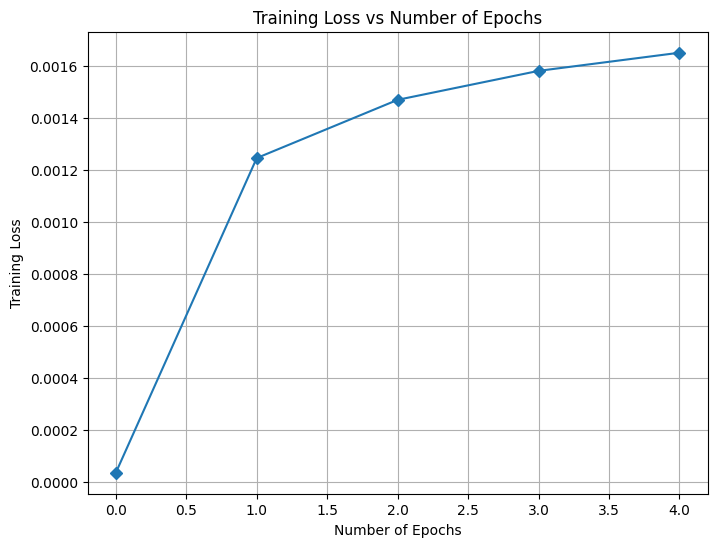

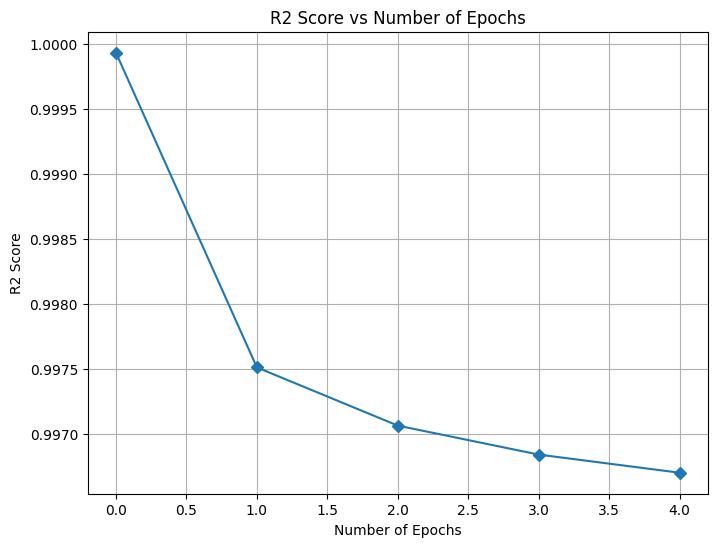

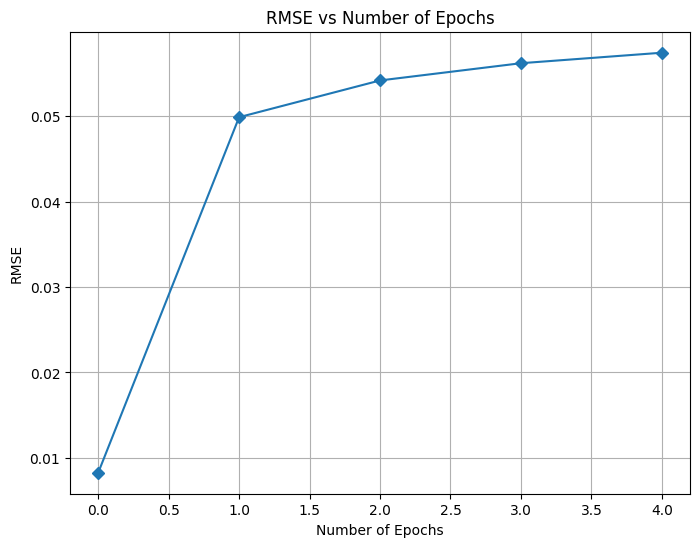

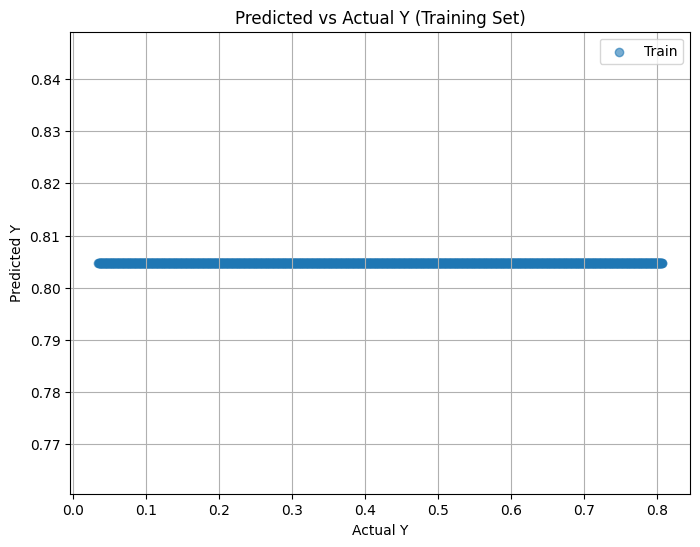

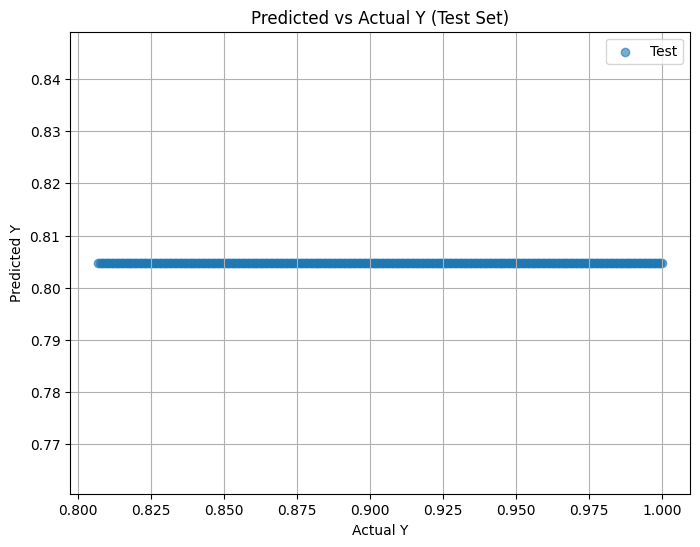

In [ ]:
import matplotlib.pyplot as plt

epochs = [entry[0] for entry in metrics_list]
training_loss = [entry[1] for entry in metrics_list]
r2score = [entry[2] for entry in metrics_list]
rmse = [entry[3] for entry in metrics_list]

# Plot 1: Training Loss vs Number of Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, training_loss, marker='D')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Number of Epochs')
plt.grid(True)
plt.show()

# Plot 2: R2 Score vs Number of Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, r2score, marker='D')
plt.xlabel('Number of Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of Epochs')
plt.grid(True)
plt.show()

# Plot 3: RMSE vs Number of Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, rmse, marker='D')
plt.xlabel('Number of Epochs')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Epochs')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt

# Assuming you have 'Y_train', 'predicted_train', 'Y_test', and 'predicted_test' defined

# Plot for Training Set
plt.figure(figsize=(8, 6))
plt.scatter(Y_train, predicted_train, label='Train', alpha=0.6)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs Actual Y (Training Set)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Test Set
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predicted_test, label='Test', alpha=0.6)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Predicted vs Actual Y (Test Set)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import optuna
import itertools

# Initialize an empty list to store trial data.
trial_data = []

def objective(trial):
    # Define lists of hyperparameter values to iterate over
    learning_rates = [0.01, 0.03, 0.06]
    num_epochs_list = [5, 10, 15]
    intializers = ["Xavier", "Zero", "Random"]
    num_hidden_units_list = [10, 15, 20]

    # Sample hyperparameters using Optuna suggestions
    learning_rate = trial.suggest_categorical("learning_rate", learning_rates)
    num_epochs = trial.suggest_categorical("num_epochs", num_epochs_list)
    intializer = trial.suggest_categorical("initializer", intializers)
    num_hidden_units = trial.suggest_categorical("num_hidden_units", num_hidden_units_list)

    lstm = RNN_LSTM(
        learning_rate,
        num_hidden_units,
        number_of_LSTM_cells,
        intializer=intializer,
        activation1="Sigmoid",
        activation2="Tanh",
        grad_intializer="Random",
        gate_intializer="zero",
    )

    lstm.fit(num_epochs, X_train, Y_train, intializer=intializer, optimizer="adam")
    predicted_test = lstm.predict(X_test)
    Test_R2Score = metrics_prediction(Y_test, predicted_test)[1]

    # Get the training metrics for this trial
    training_metrics = lstm.metrics

    # Collect the metrics of this trial into a dictionary
    trial_metrics = {
        "learning_rate": learning_rate,
        "num_epochs": num_epochs,
        "initializer": intializer,
        "num_hidden_units": num_hidden_units,
        "training_metrics": training_metrics,
        "Test_R2Score": Test_R2Score,
        "test_RMSE": test_RMSE
    }

    # Append the trial data to the list
    trial_data.append(trial_metrics)

    return Test_R2Score

if __name__ == "__main__":
    # Create a study object and optimize the objective function
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)  # You can adjust the number of trials

    # Get the best hyperparameters from the study
    best_hyperparams = study.best_params

    # Train the model with the best hyperparameters
    best_learning_rate = best_hyperparams["learning_rate"]
    best_num_epochs = best_hyperparams["num_epochs"]
    best_intializer = best_hyperparams["initializer"]
    best_num_hidden_units = best_hyperparams["num_hidden_units"]

    lstm = RNN_LSTM(
        best_learning_rate,
        best_num_hidden_units,
        number_of_LSTM_cells,
        intializer=best_intializer,
        activation1="Sigmoid",
        activation2="Tanh",
        grad_intializer="Random",
        gate_intializer="zero",
    )

    lstm.fit(
        best_num_epochs, X_train, Y_train, intializer=best_intializer, optimizer="adam"
    )

    # Get metrics for the best model
    predicted_train = lstm.predict(X_train)
    predicted_test = lstm.predict(X_test)

    train_RMSE, Train_R2Score = metrics_prediction(Y_train, predicted_train)
    test_RMSE, Test_R2Score = metrics_prediction(Y_test, predicted_test)

    # Print the results
    print("Best Hyperparameters:")
    print("Learning Rate:", best_learning_rate)
    print("Number of Epochs:", best_num_epochs)
    print("Initializer:", best_intializer)
    print("Number of Hidden Units:", best_num_hidden_units)

    print("The R2 score for the train set is", Train_R2Score)
    print("The RMSE score for the train set is", train_RMSE)
    print("The R2 score of the test set is", Test_R2Score)
    print("The RMSE score of the test set is", test_RMSE)

    # After all trials are completed, you can access the trial data to see the metrics for each trial.
    print("Trial Data:")
    print(trial_data)


ModuleNotFoundError: ignored

In [ ]:
print(predicted_train)
print(predicted_test)


In [ ]:

Y_combined = np.concatenate((Y_train, Y_test))
X_combined_model_predictions = np.concatenate((predicted_train, predicted_test))

plt.figure(figsize=(10, 6))
plt.plot(Y_train, c='red', label='True Values (Train)')
plt.plot(Y_test, c='green', label='Predicted Values (Test)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('LSTM Predictions on Combined Train and Test Sets')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()